## Introducción a la programación estadística con Python y Pandas, parte 02

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [78]:
df = pd.read_csv('dgii_clean.csv',sep=',', encoding="ISO-8859-1")
ene = df[df.mes == 'ene-16']
ene.genero.value_counts()

F    1598
M    1105
Name: genero, dtype: int64

In [133]:
spg = ene.groupby(by=['puesto_clean']).filter(lambda x: (len(x[x.genero == 'F']) > 9) and (len(x[x.genero == 'M']) > 9))
spg.puesto_clean.value_counts()

conserje                                            144
oficial ctrl contrib a                               80
auditor interno a                                    70
tasador                                              62
encargado unidad c                                   57
oficial ctrl contrib c                               57
encargado seccion                                    54
auxiliar archivo                                     52
auditor externo c                                    50
auxiliar informacion y atencion al contribuyente     50
analista                                             49
auditor interno c                                    48
auxiliar                                             45
tec gestion servicios b                              34
tec vehiculos motor                                  33
mensajero interno                                    31
encargado seccion c                                  31
oficial de alcoholes y tabacos                  

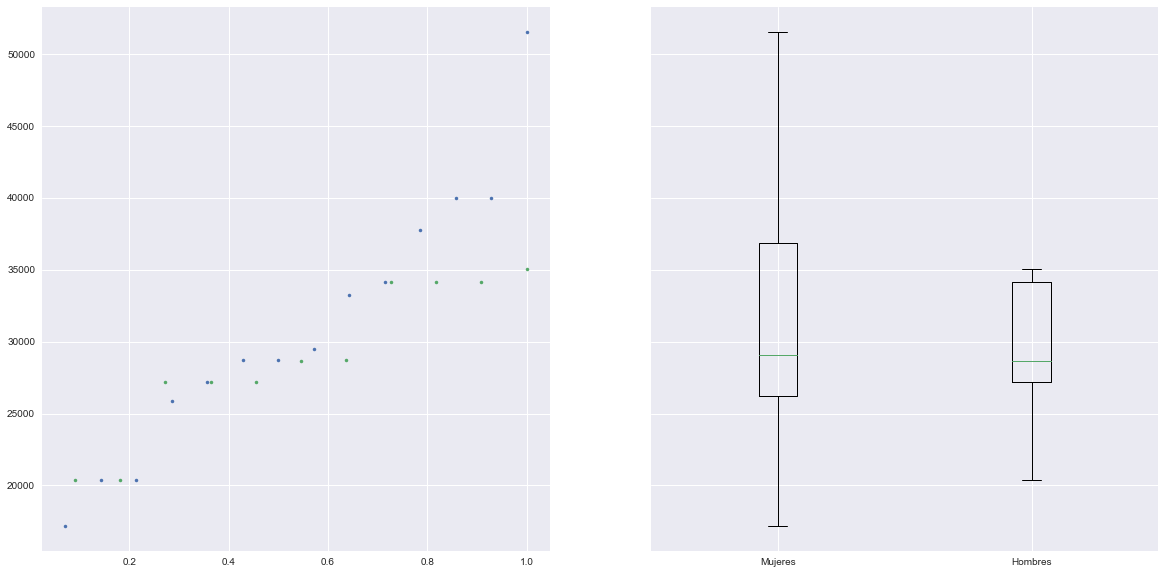

In [139]:
puesto = ene[ene.puesto_clean == 'tecnico']
mujeres = puesto.genero.value_counts()['F'] 
hombres = puesto.genero.value_counts()['M']
percentil_mujeres = np.arange(1, mujeres+1) / mujeres
salario_mujeres = np.sort(puesto.salario[puesto.genero == 'F'])
percentil_hombres = np.arange(1, hombres+1) / hombres
salario_hombres = np.sort(puesto.salario[puesto.genero == 'M'])
_, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(20,10))
ax1.plot(percentil_mujeres, salario_mujeres, marker='.', linestyle='none', label='Mujeres')
ax1.plot(percentil_hombres, salario_hombres, marker='.',linestyle='none', label='Hombres')
ax2.boxplot([salario_mujeres, salario_hombres], labels=['Mujeres','Hombres'], sym = 'k.', showcaps = True, showfliers = True)
plt.show()

In [140]:
puesto.genero.value_counts()

F    14
M    11
Name: genero, dtype: int64

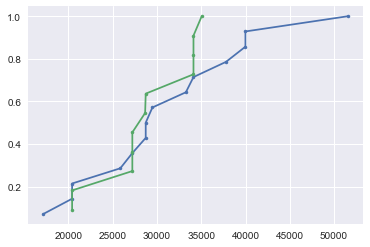

In [141]:
_ = plt.figure()
_ = plt.plot(salario_mujeres, percentil_mujeres, marker='.')
_ = plt.plot(salario_hombres, percentil_hombres, marker='.')
plt.show()

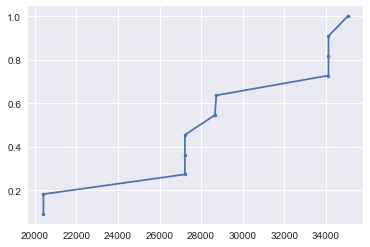

In [142]:
_ = plt.figure()
_ = plt.plot(salario_hombres, percentil_hombres, marker='.')

In [102]:
percentil_mujeres

array([ 0.03571429,  0.07142857,  0.10714286,  0.14285714,  0.17857143,
        0.21428571,  0.25      ,  0.28571429,  0.32142857,  0.35714286,
        0.39285714,  0.42857143,  0.46428571,  0.5       ,  0.53571429,
        0.57142857,  0.60714286,  0.64285714,  0.67857143,  0.71428571,
        0.75      ,  0.78571429,  0.82142857,  0.85714286,  0.89285714,
        0.92857143,  0.96428571,  1.        ])

(array([ 0.21428571,  0.21428571,  0.35714286,  0.57142857,  0.71428571,
         0.78571429,  0.92857143,  0.92857143,  0.92857143,  1.        ]),
 array([ 17168. ,  20606.8,  24045.6,  27484.4,  30923.2,  34362. ,
         37800.8,  41239.6,  44678.4,  48117.2,  51556. ]),
 <a list of 1 Patch objects>)

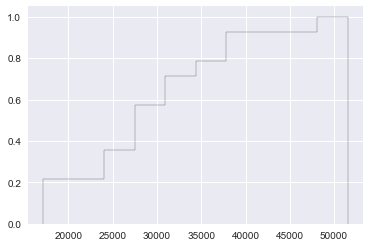

In [143]:
plt.hist(salario_mujeres, normed=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='k')

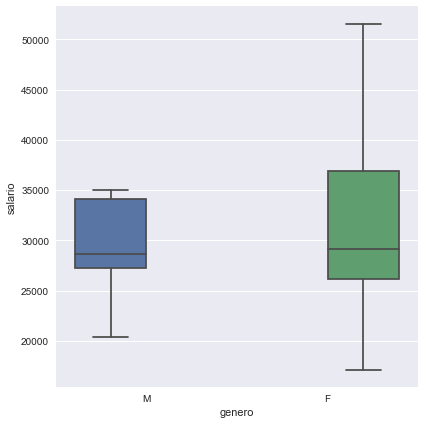

In [144]:
sns.factorplot(data=puesto, x='genero',y='salario',hue='genero', kind='box',size=6)